In [ ]:
pip install pandas liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=fe2f7d5f870ea52d09b03e6889483656cc56e3866930764efb5a57f2725400dd
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from scipy.io import arff
import arff
import requests
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut

In [ ]:
import pandas as pd
import arff
import requests
import io

# Updated URL - This should be the direct download link for the ARFF file
# Replace with the actual download link from Google Drive
url = 'https://drive.google.com/uc?export=download&id=1C6bHmbrflMk4Cc3qzzz4CHMSZCKPsliV'

# Fetch the ARFF file
response = requests.get(url)
if response.status_code == 200:
    # Parse the ARFF file using arff.load with a file-like object
    arff_data = arff.load(io.StringIO(response.text))

    # Convert to DataFrame
    dataset = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    phising_df = dataset.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
    print(phising_df.head())
else:
    print(f"Failed to fetch the file. Status code: {response.status_code}")

<ipython-input-4-85ebf696d607>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phising_df = dataset.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0                -1          1                  1                1   
1                 1          1                  1                1   
2                 1          0                  1                1   
3                 1          0                  1                1   
4                 1          0                 -1                1   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                       -1            -1                -1             -1   
1                        1            -1                 0              1   
2                        1            -1                -1             -1   
3                        1            -1                -1             -1   
4                        1            -1                 1              1   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                          -1       1

One of the challenges faced by our research was the unavailability of reliable training datasets. In fact this challenge faces any researcher in the field. However, although plenty of articles about predicting phishing websites have been disseminated these days, no reliable training dataset has been published publically, may be because there is no agreement in literature on the definitive features that characterize phishing webpages, hence it is difficult to shape a dataset that covers all possible features.
In this dataset, we shed light on the important features that have proved to be sound and effective in predicting phishing websites. In addition, we propose some new features.

In [ ]:
display(Markdown("# Data preprocessing"))

# Data preprocessing

In [ ]:
# Decode byte strings to normal strings
phising_df = phising_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Convert to appropriate numeric types where applicable
phising_df = phising_df.apply(pd.to_numeric, errors='ignore')

phising_df.head()

<ipython-input-5-e68c6a421f53>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  phising_df = phising_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
<ipython-input-5-e68c6a421f53>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  phising_df = phising_df.apply(pd.to_numeric, errors='ignore')


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Decoded the byte string data into normal string to convert numeric value

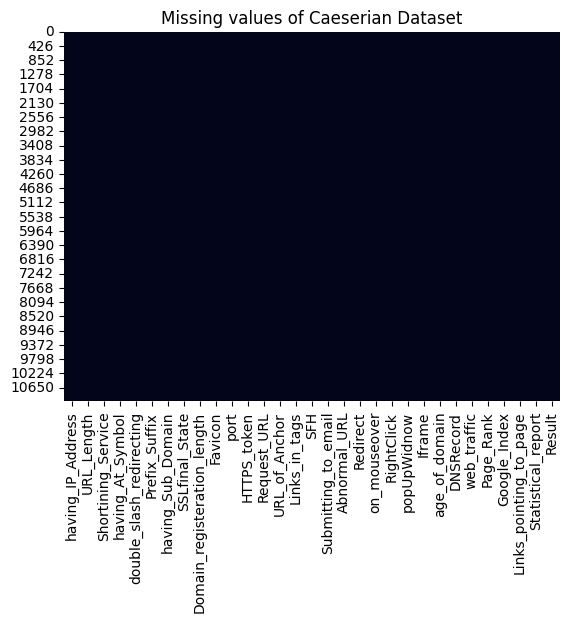

Missing Values Attribute with colimn name:
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0


In [ ]:
#Check missing values
sns.heatmap(phising_df.isnull(), cbar=False)
plt.title('Missing values of Caeserian Dataset')
plt.show()

missing_values = phising_df.isnull().sum()

print("Missing Values Attribute with colimn name:")
print(missing_values)

In this dataset there are no missing values.

In [ ]:
display(Markdown("# Exploratory Data Analysis"))

# Exploratory Data Analysis

In [ ]:
print("\n############# Summary Statistics ##############\n\n")
summary_stats = phising_df.describe(include="all")
print(summary_stats)


############# Summary Statistics ##############


       having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       11055.000000  11055.000000        11055.000000      11055.000000   
mean            0.313795     -0.633198            0.738761          0.700588   
std             0.949534      0.766095            0.673998          0.713598   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              11055.000000   11055.000000       11055.000000   
mean                   0.741474      -0.734962           0.063953   
std                  

In [ ]:
# Class distribution in the target variable
class_distribution = phising_df['Result'].value_counts()
print("\n############# Class Distribution ##############\n\n")
print(class_distribution)


############# Class Distribution ##############


Result
 1    6157
-1    4898
Name: count, dtype: int64



############# Class Distribution Plot ##############




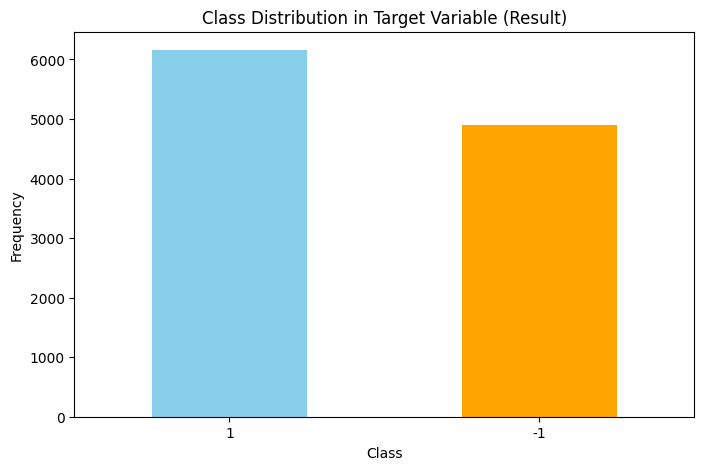

In [ ]:
print("\n############# Class Distribution Plot ##############\n\n")
# Visualizing class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in Target Variable (Result)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


The dataset's class distribution for the target variable, as shown in the bar chart, highlights the frequencies of the two classes: 1 and -1. The class labeled 1 (positive class) has a slightly higher frequency, with over 6,000 instances, while the class labeled -1 (negative class) has fewer instances, slightly below 6,000. Although there is a noticeable difference in the class counts, the dataset appears relatively balanced, with both classes having a substantial representation. This balance is beneficial for training machine learning models, as it reduces the risk of bias toward the majority class and ensures that the model can effectively learn patterns for both positive and negative outcomes.


############# Correlation Matrix ##############




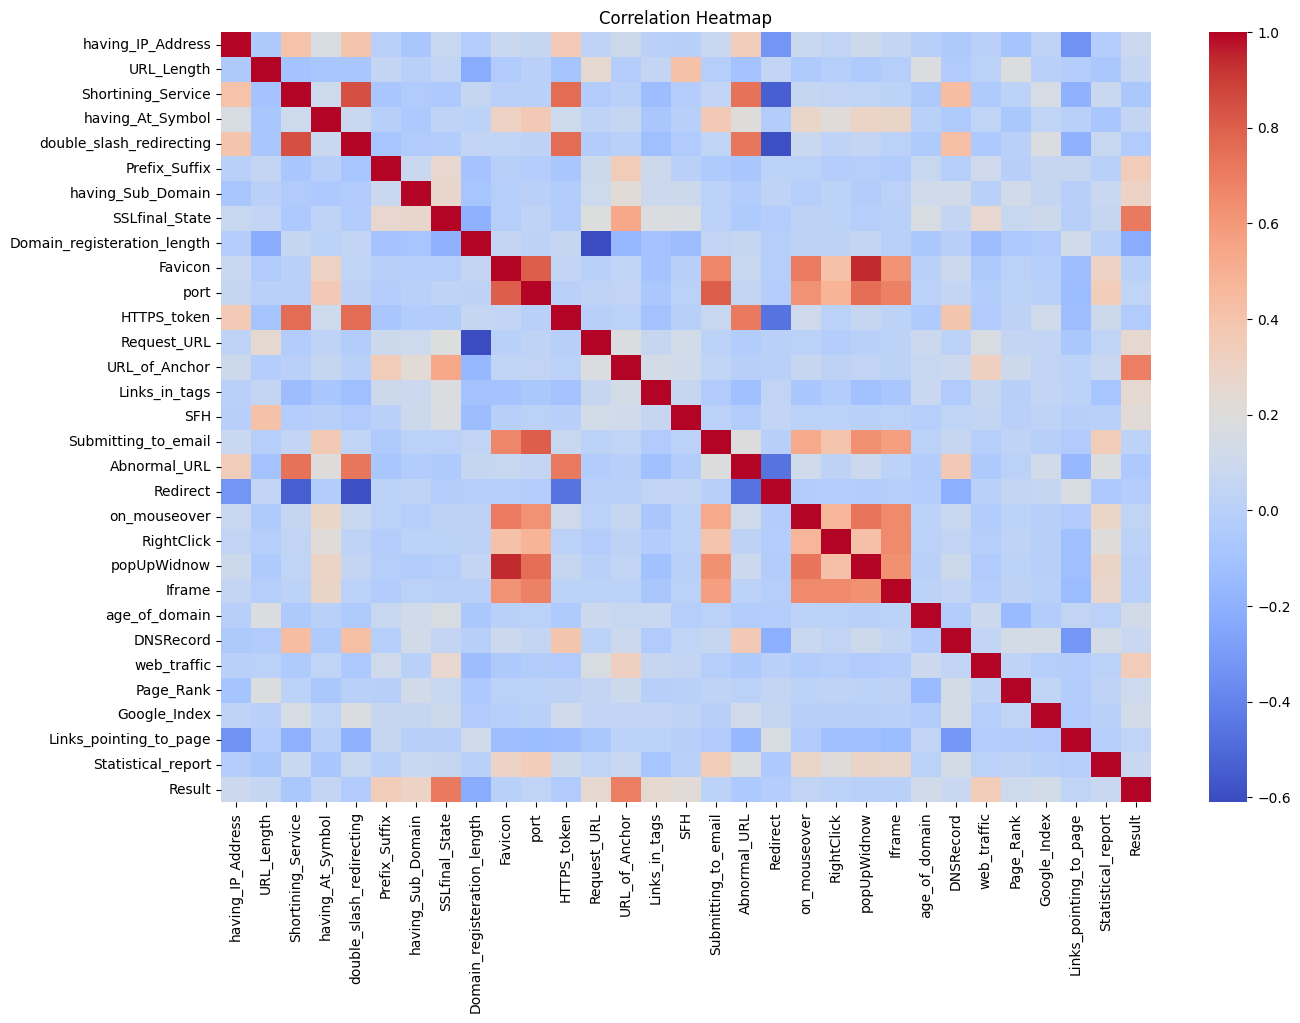

In [ ]:
print("\n############# Correlation Matrix ##############\n\n")

plt.figure(figsize=(15, 10))
corr_matrix = phising_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The dataset is represented through a correlation heatmap that visually depicts the relationships between different features and the target variable ("Result"). The diagonal of the heatmap shows a perfect correlation (
𝑟
=
1.0
r=1.0) of each feature with itself, while off-diagonal elements indicate the pairwise correlations between features.

Most features exhibit weak to moderate correlations with each other, as indicated by the lighter shades of blue and red. Stronger positive or negative correlations are sparse but noticeable in certain feature pairs, as represented by darker red (positive) or blue (negative) blocks. The "Result" variable, which is the target variable, appears to have weak to moderate correlations with some features, suggesting that no single feature dominates in determining the outcome.

This correlation matrix provides insights into multicollinearity and helps identify features that may be redundant or influential, guiding feature selection for model development. It is a useful tool for understanding the interrelationships within the dataset.

In [ ]:
display(Markdown("# Model Selection"))

# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Covert feature and target to numeric
phising_df_converted = phising_df.astype(float)
phising_df_converted

#Define the features and target
X = phising_df_converted.drop(columns=["Result"])
y = phising_df_converted["Result"]

In [ ]:
display(Markdown("# Logistic Regression"))

# Logistic Regression

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




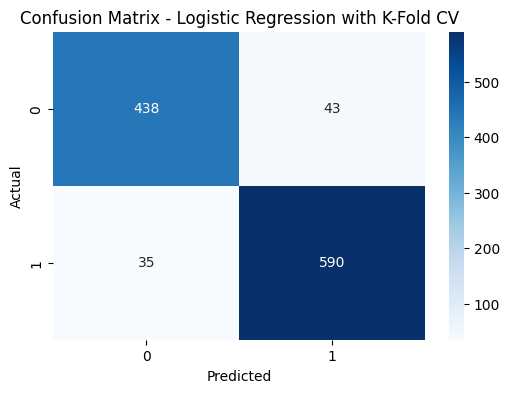



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.93      0.91      0.92       481
         1.0       0.93      0.94      0.94       625

    accuracy                           0.93      1106
   macro avg       0.93      0.93      0.93      1106
weighted avg       0.93      0.93      0.93      1106

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.92
Confusion Matrix:




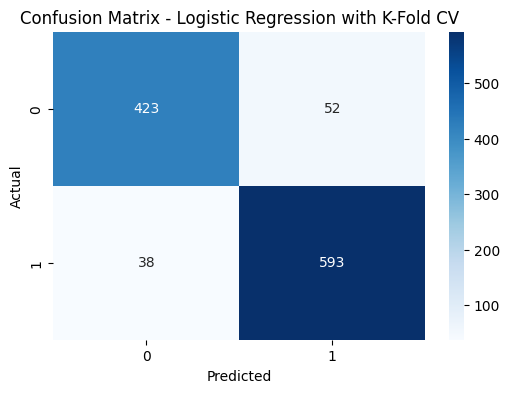



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.92      0.89      0.90       475
         1.0       0.92      0.94      0.93       631

    accuracy                           0.92      1106
   macro avg       0.92      0.92      0.92      1106
weighted avg       0.92      0.92      0.92      1106

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.92
Confusion Matrix:




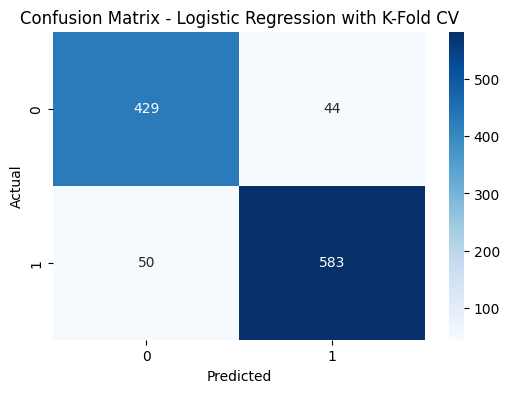



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.90      0.91      0.90       473
         1.0       0.93      0.92      0.93       633

    accuracy                           0.92      1106
   macro avg       0.91      0.91      0.91      1106
weighted avg       0.92      0.92      0.92      1106

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




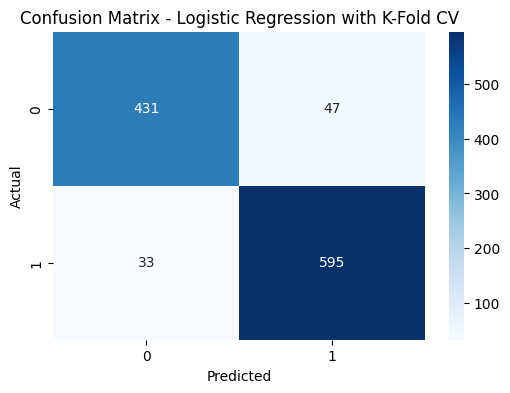



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.93      0.90      0.92       478
         1.0       0.93      0.95      0.94       628

    accuracy                           0.93      1106
   macro avg       0.93      0.92      0.93      1106
weighted avg       0.93      0.93      0.93      1106

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




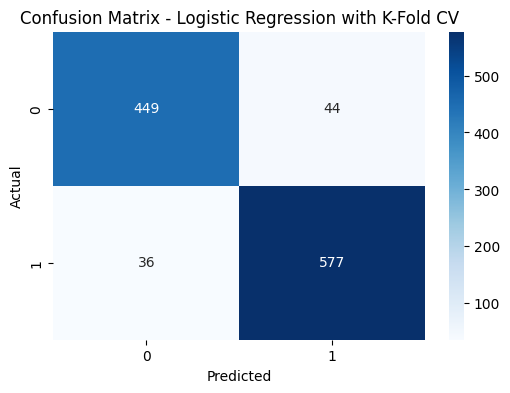



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.93      0.91      0.92       493
         1.0       0.93      0.94      0.94       613

    accuracy                           0.93      1106
   macro avg       0.93      0.93      0.93      1106
weighted avg       0.93      0.93      0.93      1106

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




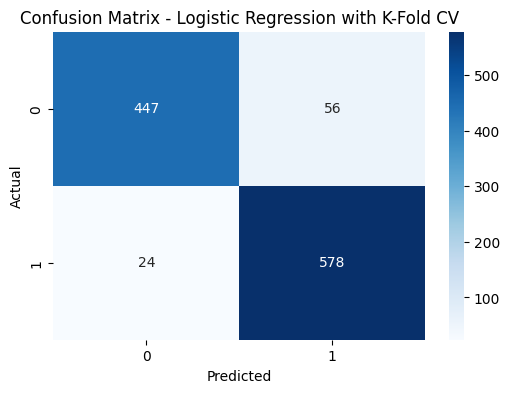



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.95      0.89      0.92       503
         1.0       0.91      0.96      0.94       602

    accuracy                           0.93      1105
   macro avg       0.93      0.92      0.93      1105
weighted avg       0.93      0.93      0.93      1105

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.92
Confusion Matrix:




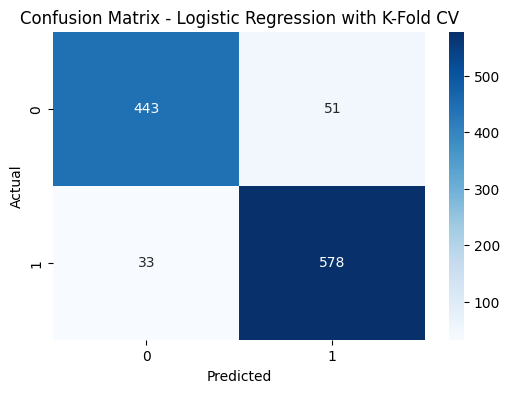



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.93      0.90      0.91       494
         1.0       0.92      0.95      0.93       611

    accuracy                           0.92      1105
   macro avg       0.92      0.92      0.92      1105
weighted avg       0.92      0.92      0.92      1105

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




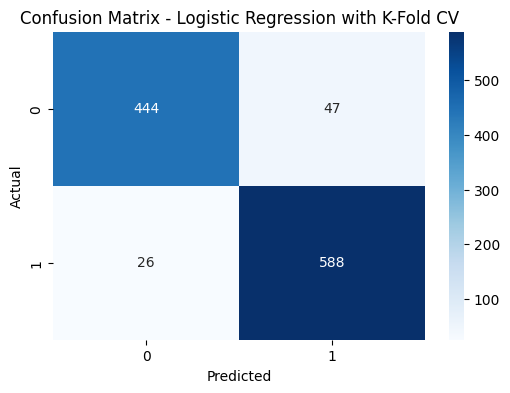



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.94      0.90      0.92       491
         1.0       0.93      0.96      0.94       614

    accuracy                           0.93      1105
   macro avg       0.94      0.93      0.93      1105
weighted avg       0.93      0.93      0.93      1105

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




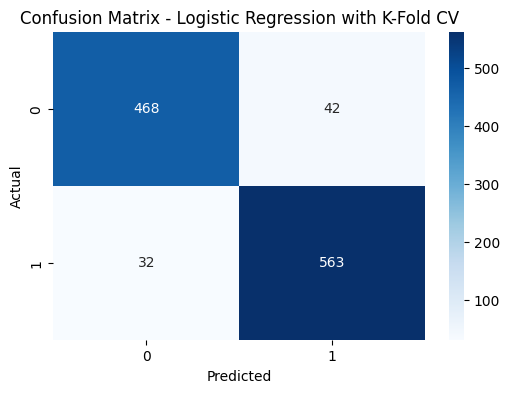



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.94      0.92      0.93       510
         1.0       0.93      0.95      0.94       595

    accuracy                           0.93      1105
   macro avg       0.93      0.93      0.93      1105
weighted avg       0.93      0.93      0.93      1105

Fitting 5 folds for each of 2 candidates, totalling 10 fits

############# Model Evaluation ##############


Accuracy: 0.93
Confusion Matrix:




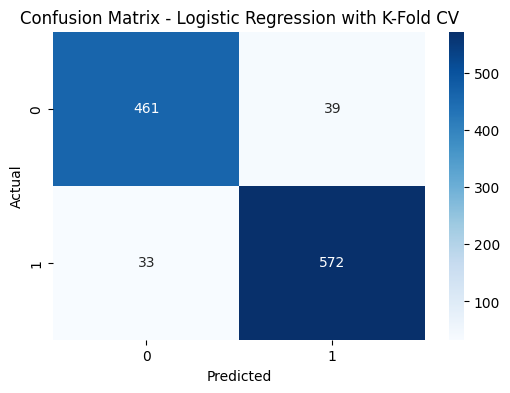



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.93      0.92      0.93       500
         1.0       0.94      0.95      0.94       605

    accuracy                           0.93      1105
   macro avg       0.93      0.93      0.93      1105
weighted avg       0.93      0.93      0.93      1105

Mean Accuracy: 0.93
Standard Deviation of Accuracy: 0.01


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
#########Train Model #########
lr_model = LogisticRegression(random_state=42)

#########Validate Model With K-Fold Cross Validation########
cv_score = KFold(n_splits=10, shuffle=True, random_state=42)

#Score List

kfold_accuracies = []
kfold_conf_matrix = []
kfold_class_report = []


#Perform K-Fold Cross Validation
for train_index, test_index in cv_score.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    param_grid = {
    'C': [0.1, 1],  # Reduced regularization strengths
    'solver': ['liblinear'],  # Single solver for simplicity
    'max_iter': [100]  # Fixed maximum iterations
    }

    # Initialize GridSearchCV for Logistic Regression
    grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


    # Perform the grid search
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train Logistic Regression with the best parameters
    optimized_lr = LogisticRegression(**best_params, random_state=42)
    optimized_lr.fit(X_train, y_train)

    ######## Make Prediction #############
    # Make predictions with the optimized model
    y_pred_optimized = optimized_lr.predict(X_test)

    print("\n############# Model Evaluation ##############\n\n")
    accuracy = accuracy_score(y_test, y_pred_optimized)
    print(f"Accuracy: {accuracy:.2f}")

    print("Confusion Matrix:\n\n")
    conf_matrix = confusion_matrix(y_test, y_pred_optimized)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Logistic Regression with K-Fold CV')
    plt.show()

    print("\n\nClassification Report:\n")
    class_report = classification_report(y_test, y_pred_optimized)
    print(class_report)

    ####### Store All the Score #########

    kfold_accuracies.append(accuracy)
    kfold_conf_matrix.append(conf_matrix)
    kfold_class_report.append(class_report)


mean_accuracy = np.mean(kfold_accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

std_accuracy = np.std(kfold_accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")



The classification report indicates strong model performance. For the -1.0 class, the precision is 0.93, recall is 0.92, and the F1-score is 0.93, demonstrating that the model effectively identifies and classifies this class with minimal false positives and false negatives. Similarly, for the 1.0 class, the precision is 0.94, recall is 0.95, and the F1-score is 0.94, highlighting consistent performance in identifying this class. The overall accuracy is 93%, indicating that the model correctly classifies the majority of instances in the dataset. The macro average and weighted average metrics (all 0.93) confirm balanced performance across classes, even with slightly imbalanced support (500 instances for -1.0 and 605 for 1.0). Additionally, the mean accuracy across evaluations is 0.93, with a low standard deviation of 0.01, demonstrating the model's reliability and consistent performance across different validation runs.

##Random Forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits

############# Model Evaluation ##############


Accuracy: 0.96
Confusion Matrix:




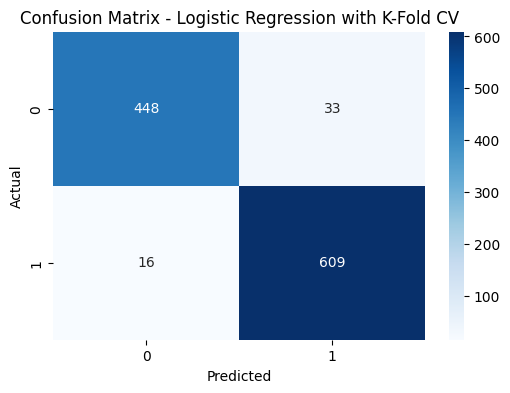



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.97      0.93      0.95       481
         1.0       0.95      0.97      0.96       625

    accuracy                           0.96      1106
   macro avg       0.96      0.95      0.95      1106
weighted avg       0.96      0.96      0.96      1106

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




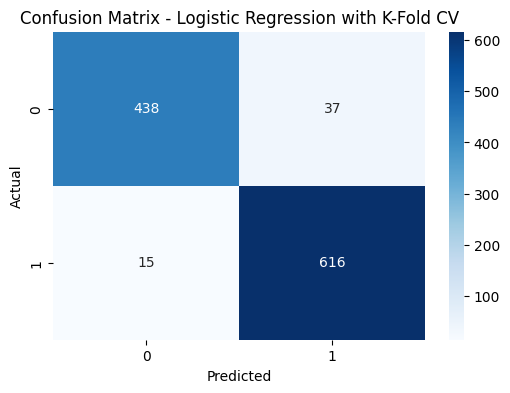



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.97      0.92      0.94       475
         1.0       0.94      0.98      0.96       631

    accuracy                           0.95      1106
   macro avg       0.96      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Fitting 5 folds for each of 144 candidates, totalling 720 fits

############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




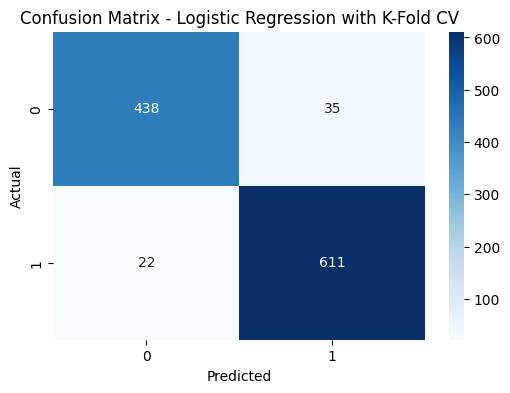



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.95      0.93      0.94       473
         1.0       0.95      0.97      0.96       633

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




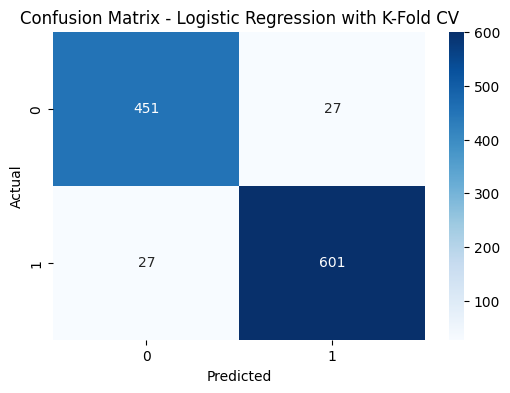



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.94      0.94      0.94       478
         1.0       0.96      0.96      0.96       628

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




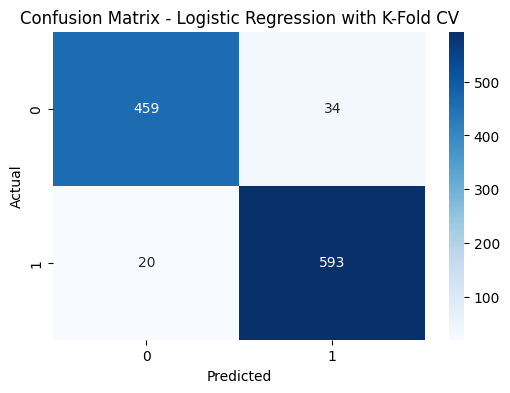



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.96      0.93      0.94       493
         1.0       0.95      0.97      0.96       613

    accuracy                           0.95      1106
   macro avg       0.95      0.95      0.95      1106
weighted avg       0.95      0.95      0.95      1106

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




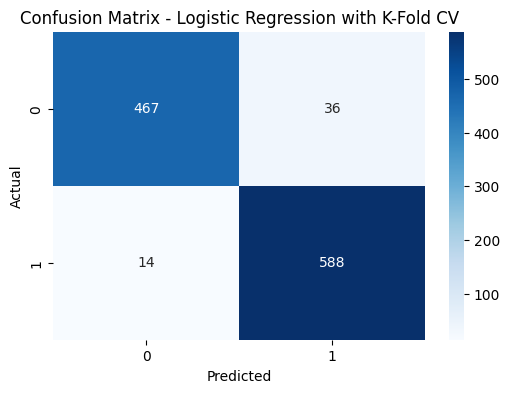



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.97      0.93      0.95       503
         1.0       0.94      0.98      0.96       602

    accuracy                           0.95      1105
   macro avg       0.96      0.95      0.95      1105
weighted avg       0.96      0.95      0.95      1105

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




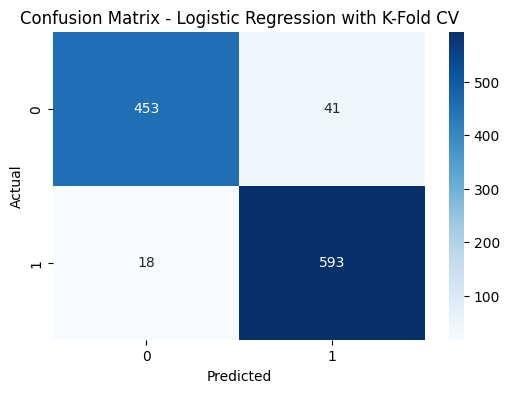



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.96      0.92      0.94       494
         1.0       0.94      0.97      0.95       611

    accuracy                           0.95      1105
   macro avg       0.95      0.94      0.95      1105
weighted avg       0.95      0.95      0.95      1105

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.96
Confusion Matrix:




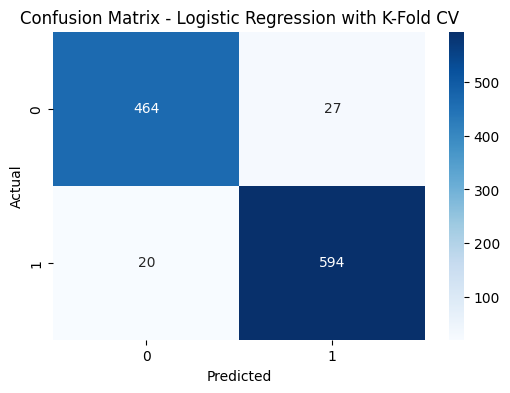



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.96      0.95      0.95       491
         1.0       0.96      0.97      0.96       614

    accuracy                           0.96      1105
   macro avg       0.96      0.96      0.96      1105
weighted avg       0.96      0.96      0.96      1105

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.96
Confusion Matrix:




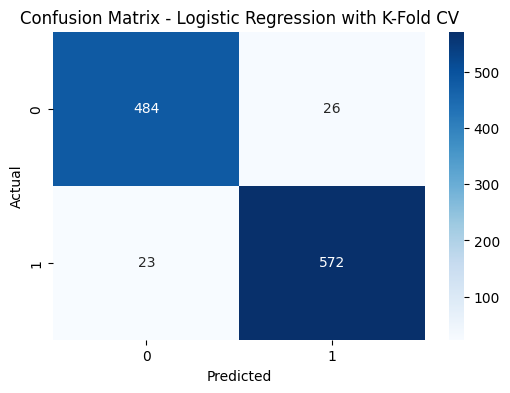



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95       510
         1.0       0.96      0.96      0.96       595

    accuracy                           0.96      1105
   macro avg       0.96      0.96      0.96      1105
weighted avg       0.96      0.96      0.96      1105

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



############# Model Evaluation ##############


Accuracy: 0.95
Confusion Matrix:




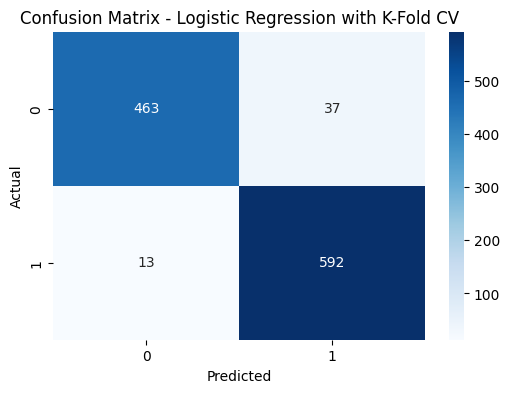



Classification Report:

              precision    recall  f1-score   support

        -1.0       0.97      0.93      0.95       500
         1.0       0.94      0.98      0.96       605

    accuracy                           0.95      1105
   macro avg       0.96      0.95      0.95      1105
weighted avg       0.96      0.95      0.95      1105

Mean Accuracy: 0.95
Standard Deviation of Accuracy: 0.00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#
#########Train Model #########
lr_model = RandomForestClassifier(n_estimators=100,random_state=42)

#########Validate Model With K-Fold Cross Validation########
cv_score = KFold(n_splits=10, shuffle=True, random_state=42)

#Score List

kfold_accuracies = []
kfold_conf_matrix = []
kfold_class_report = []


#Perform K-Fold Cross Validation
for train_index, test_index in cv_score.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    param_grid = {"criterion": ['gini', 'entropy'],
                  "max_depth": [10, 20, 50],
                  "max_features": [2, 3, 5, 7],
                  "max_leaf_nodes": [2, 45, 100],
                  "n_estimators" : [10, 50]
    }

    # Initialize GridSearchCV for Logistic Regression
    grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


    # Perform the grid search
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Train Random Forest Classifier with the best parameters
    optimized_lr = RandomForestClassifier(**best_params, random_state=42)
    optimized_lr.fit(X_train, y_train)

    ######## Make Prediction #############
    # Make predictions with the optimized model
    y_pred_optimized = optimized_lr.predict(X_test)

    print("\n############# Model Evaluation ##############\n\n")
    accuracy = accuracy_score(y_test, y_pred_optimized)
    print(f"Accuracy: {accuracy:.2f}")

    print("Confusion Matrix:\n\n")
    conf_matrix = confusion_matrix(y_test, y_pred_optimized)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Logistic Regression with K-Fold CV')
    plt.show()

    print("\n\nClassification Report:\n")
    class_report = classification_report(y_test, y_pred_optimized)
    print(class_report)

    ####### Store All the Score #########

    kfold_accuracies.append(accuracy)
    kfold_conf_matrix.append(conf_matrix)
    kfold_class_report.append(class_report)


mean_accuracy = np.mean(kfold_accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

std_accuracy = np.std(kfold_accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")



he classification report demonstrates excellent model performance. For the -1.0 class, the model achieves a precision of 0.97, recall of 0.93, and an F1-score of 0.95, indicating high accuracy with minimal false positives and effective identification of true negatives. Similarly, for the 1.0 class, the precision is 0.94, recall is 0.98, and the F1-score is 0.96, highlighting the model's ability to correctly identify the majority of true positives while minimizing false negatives. The overall accuracy is 95%, reflecting strong predictive performance across the dataset. Both the macro average and weighted average metrics (precision, recall, and F1-score) are consistent at 0.95–0.96, showing balanced performance across classes. The mean accuracy of 0.95 and a standard deviation of 0.00 indicate reliable and consistent results across validation runs. Overall, the model effectively classifies both classes with a high degree of accuracy and consistency.
